<a href="https://colab.research.google.com/github/NiloufarYousefi/-Final-project/blob/main/LogisticRegression_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

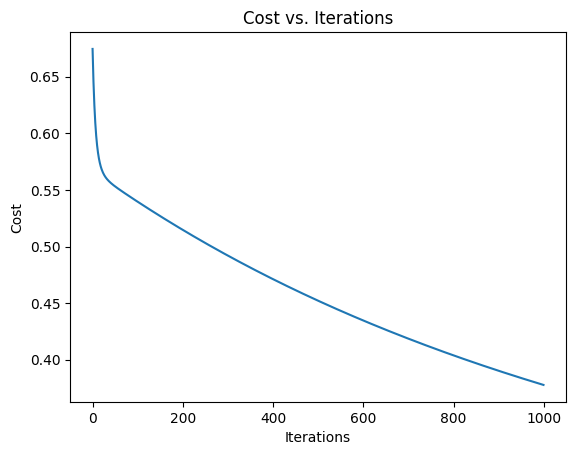

Prediction for 4.5 hours of study: Pass
Optional: Plot decision boundary: 


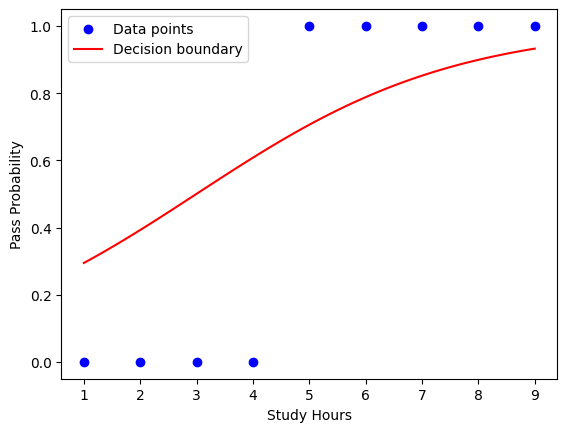

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Study hours (input) and pass/fail (output)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)  # Study hours
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(-1, 1)  # Pass/fail

# Step 2: Sigmoid function (Logistic function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Cost function for logistic regression
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Step 4: Gradient descent for logistic regression
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

# Add bias term to the input (intercept term)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of 1s

# Initial parameters (theta values)
theta = np.zeros((X_b.shape[1], 1))

# Step 5: Train the model
learning_rate = 0.01
iterations = 1000
optimal_theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Step 6: Plot cost vs. iterations
plt.plot(range(iterations), cost_history)
plt.title('Cost vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Step 7: Predict whether a student passes or fails based on study hours
def predict(X, theta):
    prob = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in prob]

# Example prediction: Predict for a student who studies for 4.5 hours
X_new = np.array([1, 4.5]).reshape(1, -1)  # Include bias term (1)
pred = predict(X_new, optimal_theta)
print(f"Prediction for 4.5 hours of study: {'Pass' if pred[0] == 1 else 'Fail'}")

# Optional: Plot decision boundary
print("Optional: Plot decision boundary: ")
plt.scatter(X, y, color='blue', label='Data points')
x_values = np.linspace(1, 9, 100)
x_b = np.c_[np.ones((x_values.shape[0], 1)), x_values]
y_values = sigmoid(np.dot(x_b, optimal_theta))
plt.plot(x_values, y_values, color='red', label='Decision boundary')
plt.xlabel('Study Hours')
plt.ylabel('Pass Probability')
plt.legend()
plt.show()
